
#Time Series with Pandas#

## Pandas Time Series Tools and Concepts

### Datatypes

* datetime64[ns]

    * A numpy datatype for storing dates and times with nanosecond precision.

```python
    import pandas as pd
    date = pd.Timestamp('2023-09-12 14:30:00')
```

* timedelta64[ns]

    * A numpy datatype for storing time durations with nanosecond precision.

```python
    import pandas as pd
    duration = pd.Timedelta(days=1, hours=2, minutes=30)
```

* Period

    * Represents a span of time, such as a month or a quarter.

```python
    import pandas as pd
    period = pd.Period('2023-09', freq='M')
```

### Datetime Indexing

* Using datetime objects as index in pandas Series or DataFrame for easy time-based operations.

```python
    import pandas as pd
    dates = pd.date_range('2023-01-01', periods=5, freq='D')
    ts = pd.Series(range(5), index=dates)
```

### Date Parsing

* Converting string representations of dates into datetime objects.

```python
    import pandas as pd
    date_string = '2023-09-12'
    parsed_date = pd.to_datetime(date_string)
```

### Resampling

* Changing the frequency of time series data.

* Down Sampling

* Reducing the frequency of time series data (e.g., from daily to monthly).

```python
    import pandas as pd
    dates = pd.date_range('2023-01-01', periods=100, freq='D')
    ts = pd.Series(range(100), index=dates)
    monthly = ts.resample('M').mean()
```

* Up Sampling

    * Increasing the frequency of time series data (e.g., from monthly to daily).

```python
    import pandas as pd
    dates = pd.date_range('2023-01-01', periods=12, freq='M')
    ts = pd.Series(range(12), index=dates)
    daily = ts.resample('D').ffill()
```

### Rolling Windows

* Performing calculations on a sliding window of data points.

```python
    import pandas as pd
    import numpy as np
    dates = pd.date_range('2023-01-01', periods=100, freq='D')
    ts = pd.Series(np.random.randn(100), index=dates)
    rolling_mean = ts.rolling(window=7).mean()
```

### Time Zone Handling

* Working with time series data across different time zones.

```python
    import pandas as pd
    date = pd.Timestamp('2023-09-12 14:30:00', tz='UTC')
    local_date = date.tz_convert('US/Eastern')
```

### Assignment ###

* Accept 20 numbers from user and store them in 4 (5 numbers in each list)

* Convert lists into 2 numpy array (list1, list2 in array1 and list3 and list4 in array2)

* Find member wise addition, multiplication, subtraction also find exponential of first array

In [ ]:

import numpy as np

"""
numbers = []
for i in range(20):
    number = int(input(f"Enter number {i+1}: "))
    numbers.append(number)
    
"""
numbers = [0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9]

list1 = numbers[:5]
list2 = numbers[5:10]
list3 = numbers[10:15]
list4 = numbers[15:]

array1 = np.array([list1, list2])
array2 = np.array([list3, list4])

addition = array1 + array2
multiplication = array1 * array2
subtraction = array1 - array2

exponential = np.exp(array1)

print("Array 1:\n", array1)
print("Array 2:\n", array2)
print("Addition:\n", addition)
print("Multiplication:\n", multiplication)
print("Subtraction:\n", subtraction)
print("Exponential:\n", exponential)

Array 1:
 [[0 1 2 3 4]
 [5 6 7 8 9]]
Array 2:
 [[0 1 2 3 4]
 [5 6 7 8 9]]
Addition:
 [[ 0  2  4  6  8]
 [10 12 14 16 18]]
Multiplication:
 [[ 0  1  4  9 16]
 [25 36 49 64 81]]
Subtraction:
 [[0 0 0 0 0]
 [0 0 0 0 0]]
Exponential:
 [[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
  5.45981500e+01]
 [1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03
  8.10308393e+03]]


In [4]:

import pandas as pd
import numpy as np

# Creating Time Series Data
print("\n1. Creating Time Series Data")
print("-----------------------------")
total = 100
dates = pd.date_range('2023-01-01', periods=total, freq='D')
data = np.random.randint(0, total, size=total)
time_series = pd.Series(data, index=dates)
print("Daily time series:")
print(time_series.head())

hourly_dates = pd.date_range('2023-01-01', periods=total, freq='h')
hourly_data = np.random.randint(0, total, size=total)
hourly_time_series = pd.Series(hourly_data, index=hourly_dates)
print("\nHourly time series:")
print(hourly_time_series.head())

# Basic Indexing and Slicing
print("\n2. Basic Indexing and Slicing")
print("------------------------------")
print("Value on 2023-01-05:")
print(time_series['2023-01-05'])
print("\nSlice from 2023-01-05 to 2023-01-24:")
print(time_series['2023-01-05': '2023-01-24'])
print("\nValues greater than 50:")
print(time_series[time_series > 50])

# Advanced Indexing (loc, iloc)
print("\n3. Advanced Indexing (loc, iloc)")
print("----------------------------------")
print("Using .loc for label-based indexing:")
print(hourly_time_series.loc['2023-01-02'])
print("\nUsing .loc for label-based slicing:")
print(hourly_time_series.loc['2023-01-02 10:00':'2023-01-02 15:00'])
print("\nUsing .iloc for integer-based indexing:")
print(hourly_time_series.iloc[24:48])
print("\nUsing .iloc for integer-based slicing with step:")
print(hourly_time_series.iloc[::12])
print("\nUsing .at for fast label-based scalar lookup:")
print(hourly_time_series.at['2023-01-02 12:00'])
print("\nUsing .iat for fast integer-based scalar lookup:")
print(hourly_time_series.iat[25])

# Resampling
print("\n4. Resampling")
print("-------------")
print("Resampling to daily frequency (mean):")
daily_resampled = hourly_time_series.resample('D').mean()
print(daily_resampled.head())
print("\nResampling to weekly frequency (sum):")
weekly_resampled = time_series.resample('W').sum()
print(weekly_resampled.head())
print("\nResampling with custom aggregation:")
custom_resampled = hourly_time_series.resample('D').agg(['mean', 'min', 'max'])
print(custom_resampled.head())

# Rolling Windows
print("\n5. Rolling Windows")
print("------------------")
print("Rolling 24-hour window average:")
rolling_avg = hourly_time_series.rolling(window=24).mean()
print(rolling_avg.head(30))

# Time Zone Handling
print("\n6. Time Zone Handling")
print("---------------------")
print("Original time zone:")
print(hourly_time_series.index.tz)
localized_series = hourly_time_series.tz_localize('UTC')
print("\nLocalized to UTC:")
print(localized_series.index.tz)
converted_series = localized_series.tz_convert('US/Eastern')
print("\nConverted to US/Eastern:")
print(converted_series.index.tz)

# Handling Missing Values
print("\n7. Handling Missing Values")
print("--------------------------")
# Create a series with missing values
ts_with_nans = time_series.copy()
ts_with_nans[10:20] = np.nan
print("Time series with NaNs:")
print(ts_with_nans.head(25))

print("\nChecking for missing values:")
print(ts_with_nans.isnull().sum())

print("\nDropping missing values:")
print(ts_with_nans.dropna().head(25))

print("\nFilling missing values with a specific value:")
print(ts_with_nans.fillna(0).head(25))

print("\nFilling missing values with forward fill:")
print(ts_with_nans.ffill().head(25))

print("\nFilling missing values with backward fill:")
print(ts_with_nans.bfill().head(25))

print("\nInterpolating missing values:")
print(ts_with_nans.interpolate().head(25))

# Date Functionality
print("\n8. Date Functionality")
print("---------------------")
print("Extracting year from index:")
print(time_series.index.year[:5])

print("\nExtracting month from index:")
print(time_series.index.month[:5])

print("\nExtracting day of week from index:")
print(time_series.index.dayofweek[:5])

print("\nFiltering weekdays:")
weekdays = time_series[time_series.index.dayofweek < 5]
print(weekdays.head())

# Shifting and Lagging
print("\n9. Shifting and Lagging")
print("-----------------------")
print("Shifting the time series by 1 day:")
shifted = time_series.shift(periods=1)
print(shifted.head())

print("\nLagging the time series by 1 day:")
lagged = time_series.shift(periods=-1)
print(lagged.head())

# Time Series Decomposition
print("\n10. Time Series Decomposition")
print("-----------------------------")

from statsmodels.tsa.seasonal import seasonal_decompose
# Create a series with a clear trend and seasonality
trend = np.linspace(0, 10, total)
seasonal = np.sin(np.linspace(0, 8*np.pi, total))
random = np.random.randn(total)
complex_series = pd.Series(trend + seasonal + random, index=dates)

result = seasonal_decompose(complex_series, model='additive')
print("Trend component:")
print(result.trend.head())
print("\nSeasonal component:")
print(result.seasonal.head())
print("\nResidual component:")
print(result.resid.head())

print(39*'\n')


1. Creating Time Series Data
-----------------------------
Daily time series:
2023-01-01    53
2023-01-02     9
2023-01-03    76
2023-01-04    88
2023-01-05    93
Freq: D, dtype: int64

Hourly time series:
2023-01-01 00:00:00     2
2023-01-01 01:00:00    10
2023-01-01 02:00:00    98
2023-01-01 03:00:00    70
2023-01-01 04:00:00    36
Freq: h, dtype: int64

2. Basic Indexing and Slicing
------------------------------
Value on 2023-01-05:
93

Slice from 2023-01-05 to 2023-01-24:
2023-01-05    93
2023-01-06     7
2023-01-07    42
2023-01-08    55
2023-01-09    35
2023-01-10    17
2023-01-11    82
2023-01-12     6
2023-01-13    14
2023-01-14     4
2023-01-15    15
2023-01-16     5
2023-01-17    74
2023-01-18    37
2023-01-19    32
2023-01-20    85
2023-01-21    19
2023-01-22    74
2023-01-23     5
2023-01-24    47
Freq: D, dtype: int64

Values greater than 50:
2023-01-01    53
2023-01-03    76
2023-01-04    88
2023-01-05    93
2023-01-08    55
2023-01-11    82
2023-01-17    74
2023-01-20 

### Assignment 1 ###

Analyzing and Forecasting Stock Exchange Data

`Dataset`: https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset

`Load and Inspect the Data`

* Load the dataset into a Pandas DataFrame.

* Inspect the first few rows and check the structure of the dataset.

* Ensure that the date column is in the correct format and set it as the index.

`Clean Data`

* Check for missing values and handle them appropriately (e.g., forward fill, backward fill, interpolation).

* Detect any anomalies or outliers in the stock prices.

`Analyze the Data`

* Resample the data to weekly and monthly frequencies to analyze stock price patterns.

`Forecast Future Prices`

* Split the data into training and testing sets (e.g., use the first 80% for training and the last 20% for testing).

* Use a forecasting method (e.g., moving average) to predict future stock prices

                 Open   High        Low      Close  Adj Close   Volume
Date                                                                  
2015-05-18  18.000000  18.00  17.030001  18.000000  12.911796  2197500
2015-05-19  17.920000  19.15  17.920000  18.799999  13.485645  1978700
2015-05-20  18.700001  18.84  18.360001  18.610001  13.349364   717600
2015-05-21  18.600000  18.66  18.020000  18.250000  13.091125   793000
2015-05-22  18.250000  18.40  18.049999  18.209999  13.062433   536200
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


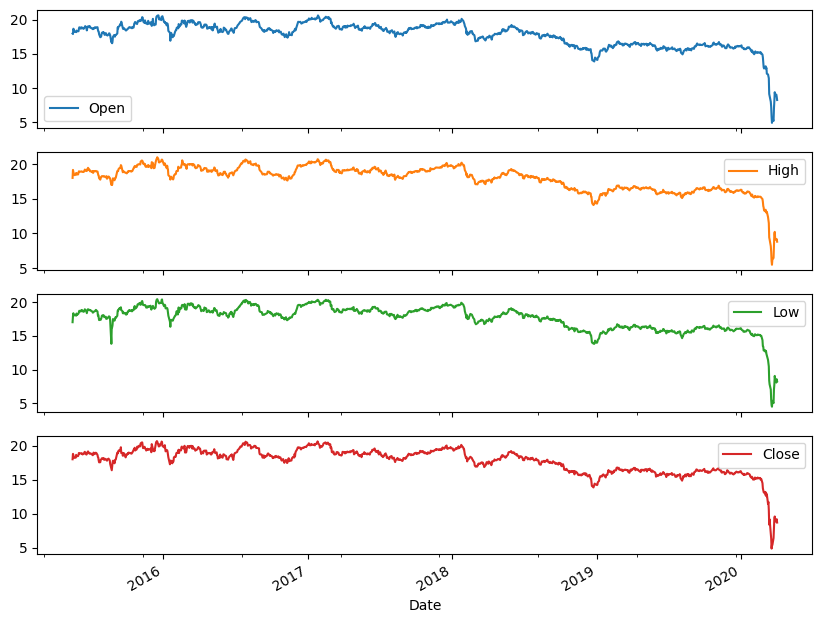

Q1 :  16.399999618530273 Q3 :  19.07999992370605 IQR :  2.6800003051757777 lower_bound :  12.379999160766607 upper_bound :  23.10000038146972
Q1 :  16.510000228881836 Q3 :  19.209999084472656 IQR :  2.6999988555908203 lower_bound :  12.460001945495605 upper_bound :  23.259997367858887
Q1 :  16.309999465942383 Q3 :  18.920000076293945 IQR :  2.6100006103515625 lower_bound :  12.394998550415039 upper_bound :  22.83500099182129
Q1 :  16.399999618530273 Q3 :  19.059999465942383 IQR :  2.6599998474121094 lower_bound :  12.40999984741211 upper_bound :  23.049999237060547
Q1 :  14.495708227157593 Q3 :  15.688113689422607 IQR :  1.1924054622650146 lower_bound :  12.70710003376007 upper_bound :  17.47672188282013
Outliers Removed :
                  Open   High        Low      Close  Adj Close   Volume
Date                                                                  
2015-05-18  18.000000  18.00  17.030001  18.000000  12.911796  2197500
2015-05-19  17.920000  19.15  17.920000  18.799999  1

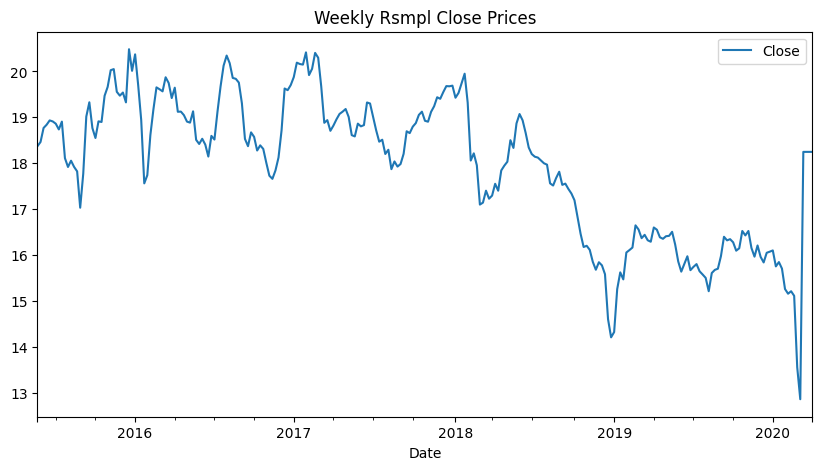

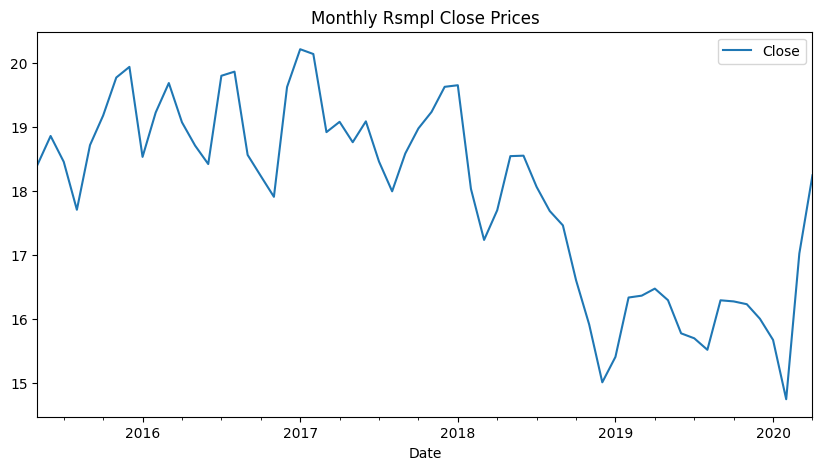

Training set size : 982
Testing set size : 246
Date
2015-05-18       NaN
2015-05-19       NaN
2015-05-20       NaN
2015-05-21       NaN
2015-05-22    18.374
               ...  
2019-04-04    16.520
2019-04-05    16.606
2019-04-08    16.638
2019-04-09    16.612
2019-04-10    16.614
Name: Close, Length: 982, dtype: float64
Forecasted value of the next period : 16.613999557495116


In [3]:

import pandas as pd
import matplotlib.pyplot as plt

url = f'https://drive.google.com/uc?id=1rMWVFKSmZSR_8Taa4kVWSxA-GYJGTgai'

df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.head(5))



print(df.isna().sum())
df.ffill(inplace=True)
print(df.isna().sum())



df[['Open', 'High', 'Low', 'Close']].plot(subplots=True, figsize=(10, 8))
plt.show()



def remove_outliers(key):
    Q1 = df[key].quantile(0.25)
    Q3 = df[key].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print('Q1 : ', Q1,'Q3 : ', Q3, 'IQR : ', IQR, 'lower_bound : ', lower_bound, 'upper_bound : ', upper_bound)
    df.loc[(df[key] < lower_bound) | (df[key] > upper_bound), key] = df[key].median()

for key in df.keys():
    if key in ['Date' , 'Volume']:
        continue
    remove_outliers(key)
print("Outliers Removed :\n",df.head())




df_weekly = df.resample('W').mean()
df_monthly = df.resample('M').mean()

df_weekly[['Close']].plot(figsize=(10, 5), title='Weekly Rsmpl Close Prices')
plt.show()
df_monthly[['Close']].plot(figsize=(10, 5), title='Monthly Rsmpl Close Prices')
plt.show()



train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

print(f"Training set size : {len(train)}")
print(f"Testing set size : {len(test)}")

def moving_average_forecast(train, window_size):
    mvf = train['Close'].rolling(window=window_size).mean()
    # print(mvf)
    return mvf.iloc[-1]

window_size = 5
forecast_value = moving_average_forecast(train, window_size)

print(f"Forecasted value of the next period : {forecast_value}")